In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




# Chapter 9 - MARKOV CHAIN MONTE CARLO

### 9E1.

Which of the following is a requirement of the simple Metropolis algorithm?

(1) The parameters must be discrete.

(2) The likelihood function must be Gaussian.

(3) The proposal distribution must be symmetric

3

### 9E2.

Gibbs sampling is more efficient than the Metropolis algorithm. How does it achieve this extra
efficiency? Are there any limitations to the Gibbs sampling strategy?

adaptive proposals, where the proposal is adjusted by the parameter values at the moment

### 9E3.

Which sort of parameters can Hamiltonian Monte Carlo not handle? Can you explain why?

it cannot have discrete parameter due to differentiability requirement for the potential energy

### 9E4.

Explain the difference between the effective number of samples, `n_eff` as calculated by Stan. and the actual number of samples

an estimate of the number of independent samples from the posterior distribution, or a length of a Markov chain with no autocorrelation that would provide the same quality as the existing chain

### 9E5.

Which value should Rhat approach, when a chain is sampling the posterior distribution correctly?

approach 1 from above

### 9M1.

Re-estimate the terrain ruggedness model from the chapter, but now using a uniform prior
for the standard deviation, sigma. The uniform prior should be dunif(0,1). Use ulam to estimate
the posterior. Does the different prior have any detectible influence on the posterior distribution of
sigma? Why or why not?

In [8]:
data(rugged)

In [9]:
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )


In [10]:
dat_slim <- list(
    log_gdp_std = dd$log_gdp_std,
    rugged_std = dd$rugged_std,
    cid = as.integer( dd$cid )
)

In [11]:
m9.1_mod <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dunif(0,1)
        ), data = dat_slim, chains = 1)

Warning in '/tmp/RtmpEea6Tu/model-247733ae5904.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpEea6Tu/model-247733ae5904.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 finished in 0.1 seconds.


In [14]:
m9.1 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1)

Warning in '/tmp/RtmpEea6Tu/model-247748339a8d.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


It looks like with uniform, we got this one ill-conditioned sampling, but the error message suggest that it is ok 

In [17]:
precis(m9.1_mod, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8858661,0.015898768,0.86131345,0.91195897,623.8379,1.0000349
a[2],1.0498330,0.009826327,1.03493010,1.06533660,875.1452,0.9980162
b[1],0.1327948,0.075754383,0.01387392,0.25411280,592.5839,0.9981182
b[2],-0.1446413,0.055290645,-0.23080509,-0.06484407,693.1663,0.9984709
sigma,0.1113792,0.005747716,0.10254650,0.12132106,498.0527,1.0079817


In [18]:
precis(m9.1, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8870462,0.015766012,0.86150469,0.91221299,588.6343,0.9980605
a[2],1.0502025,0.010027665,1.03344335,1.06640105,704.1930,0.9983913
b[1],0.1314328,0.073656789,0.02103799,0.25444704,725.0349,0.9982027
b[2],-0.1405872,0.056508322,-0.23033817,-0.05294874,512.2924,0.9997336
sigma,0.1117403,0.006112304,0.10148159,0.12144289,524.0529,0.9983227


we are not observing any major differences between the two. It seems that there are enough data to drown out the differences in the prior

### 9M2.

Modify the terrain ruggedness model again. This time, change the prior for b[cid] to dexp(0.3).
What does this do to the posterior distribution? Can you explain it?

In [19]:
m9m2<- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dexp(0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1)

Warning in '/tmp/RtmpEea6Tu/model-24774cf89d2.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpEea6Tu/model-24774cf89d2.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


In [20]:
precis(m9m2, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.88835347,0.016491934,0.8616089500,0.9149706,307.4168,0.9991148
a[2],1.04847018,0.010760057,1.0309167500,1.0651200,369.7853,0.9991985
b[1],0.14636098,0.068271614,0.0450947460,0.2662600,206.8909,0.9986841
b[2],0.01759612,0.017669205,0.0009595518,0.0482799,604.1858,0.9993326
sigma,0.11429226,0.006302984,0.1050301750,0.1246150,416.9741,1.0009261


In [21]:
precis(m9.1, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8870462,0.015766012,0.86150469,0.91221299,588.6343,0.9980605
a[2],1.0502025,0.010027665,1.03344335,1.06640105,704.1930,0.9983913
b[1],0.1314328,0.073656789,0.02103799,0.25444704,725.0349,0.9982027
b[2],-0.1405872,0.056508322,-0.23033817,-0.05294874,512.2924,0.9997336
sigma,0.1117403,0.006112304,0.10148159,0.12144289,524.0529,0.9983227


this has now changed b, it barely changed b[1] but definitely changed b[2] which went from positive to negative. 

This can be attributed to the exponential prior requires the paramters to be positive, so it cannot be -0.14

### 9M3.

Re-estimate one of the Stan models from the chapter, but at different numbers of warmup iterations. Be sure to use the same number of sampling iterations in each case. Compare the n_eff
values. How much warmup is enough?

In [30]:
m_warmup_100 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1, warmup = 100, iter=2000)

Warning in '/tmp/RtmpEea6Tu/model-24774819ad0b.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 WARNING: There aren't enough warmup iterations to fit the 
Chain 1          three stages of adaptation as currently configured. 
Chain 1          Reducing each adaptation stage to 15%/75%/10% of 
Chain 1          the given number of warmup iterations: 
Chain 1            init_buffer = 15 
Chain 1            adapt_window = 75 
Chain 1            term_buffer = 10 
Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  101 / 2000 [  5%]  (Sampling) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Sampling) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Sampling) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Sampling) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Sampling) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Sampling) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Sampling) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Sampling) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpEea6Tu/model-24774819ad0b.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration: 1000 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.


In [26]:
m_warmup_50 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1, warmup = 50)

Warning in '/tmp/RtmpEea6Tu/model-2477462121e9.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 WARNING: There aren't enough warmup iterations to fit the 
Chain 1          three stages of adaptation as currently configured. 
Chain 1          Reducing each adaptation stage to 15%/75%/10% of 
Chain 1          the given number of warmup iterations: 
Chain 1            init_buffer = 7 
Chain 1            adapt_window = 38 
Chain 1            term_buffer = 5 
Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration:  51 / 1000 [  5%]  (Sampling) 
Chain 1 Iteration: 150 / 1000 [ 15%]  (Sampling) 
Chain 1 Iteration: 250 / 1000 [ 25%]  (Sampling) 
Chain 1 Iteration: 350 / 1000 [ 35%]  (Sampling) 
Chain 1 Iteration: 450 / 1000 [ 45%]  (Sampling) 
Chain 1 Iteration: 550 / 1000 [ 55%]  (Sampling) 
Chain 1 Iteration: 650 / 1000 [ 65%]  (Sampling) 
Chain 1 Iteration: 750 / 1000 [ 75%]  (Sampling) 
Chain 1 Iteration: 850 / 1000 [ 85%]  (Sampling) 
Chain 1 Iteration: 950 / 1000 [ 95%]  (Sampling) 
Chain 1 Iteration: 1000

In [31]:
m_warmup_500 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1, warmup = 500, iter=2000)

Warning in '/tmp/RtmpEea6Tu/model-24777ff0b4a6.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  501 / 2000 [ 25%]  (Sampling) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Sampling) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Sampling) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Sampling) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Sampling) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%

In [34]:
m_warmup_1000 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1, warmup = 1000, iter = 2000)

Warning in '/tmp/RtmpEea6Tu/model-2477251b5ace.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpEea6Tu/model-2477251b5ace.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


In [35]:
m_warmup_1500 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1), 
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
        ), data = dat_slim, chains = 1, warmup = 1500, iter = 2000)

Warning in '/tmp/RtmpEea6Tu/model-247752fca2b1.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Warmup) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Warmup) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Warmup) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Warmup) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Warmup) 
Chain 1 Iteration: 1501 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain

In [36]:
precis(m_warmup_50, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8866607,0.015659040,0.86096733,0.91111160,1030.4470,0.9989543
a[2],1.0501637,0.010169000,1.03361705,1.06598490,988.2105,0.9991198
b[1],0.1309867,0.074839972,0.01435978,0.25238550,442.3558,0.9998944
b[2],-0.1416763,0.055614894,-0.23181529,-0.05429623,663.0703,1.0025928
sigma,0.1115016,0.006441014,0.10171104,0.12242879,556.6169,1.0081666


In [37]:
precis(m_warmup_100, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8861027,0.01537114,0.86073537,0.90966488,2061.560,0.9999581
a[2],1.0505314,0.01027472,1.03440000,1.06689880,2274.430,0.9995685
b[1],0.1284368,0.07461007,0.01052533,0.25249552,929.778,0.9994819
b[2],-0.1425858,0.05469386,-0.23013617,-0.05658728,1383.635,1.0013335
sigma,0.1114010,0.00593045,0.10208078,0.12109644,1229.984,1.0075074


In [39]:
precis(m_warmup_500, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8865690,0.015902235,0.85998882,0.91240710,1891.796,1.0000045
a[2],1.0504642,0.010105794,1.03389230,1.06714660,2287.305,0.9993661
b[1],0.1342087,0.076147029,0.01304174,0.25108028,1921.813,0.9993717
b[2],-0.1417920,0.054528760,-0.22801456,-0.05648288,2096.016,0.9995429
sigma,0.1116294,0.006276033,0.10207912,0.12230051,2181.611,0.9993428


In [40]:
precis(m_warmup_1000, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8865959,0.014956997,0.86230824,0.91044746,1189.0323,0.9989995
a[2],1.0509904,0.009605617,1.03621945,1.06679165,977.4508,0.9992112
b[1],0.1329878,0.070745822,0.01741036,0.24442342,1142.0205,0.9989998
b[2],-0.1444674,0.053791592,-0.23027632,-0.05805588,1736.7321,0.9990021
sigma,0.1112654,0.005951967,0.10199689,0.12113650,1290.8227,0.9994018


In [41]:
precis(m_warmup_1500, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.8854088,0.016078884,0.86031606,0.91209264,527.5777,0.9988747
a[2],1.0499993,0.009157043,1.03569445,1.06470775,1035.8161,0.9982557
b[1],0.1316504,0.075116523,0.01501769,0.25690069,696.1349,0.9982359
b[2],-0.1436957,0.054802349,-0.23072472,-0.06111223,496.5020,1.0001049
sigma,0.1113644,0.006055662,0.10168556,0.12014160,947.5646,1.0002476


n_eff is significantly lower when warmup increases, which means the samping is much more efficient

### 9H1.

Run the model below and then inspect the posterior distribution and explain what it is accomplishing.

In [42]:
mp <- ulam(
    alist(
        a ~ dnorm(0,1), 
        b ~ dcauchy(0, 1)
        ), data = list(y=1), chains = 1)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


In [43]:
precis(mp)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.008604581,1.076741,-1.865394,1.527486,66.44636,1.0124298
b,0.215047445,9.989682,-6.112007,5.447397,448.98373,0.9980239


basically the code is giving one data point 1, there is no likelihood, just priors. Not entirely sure what the MCMC is doing, it should just show the same posterior as the prior since no likelihood

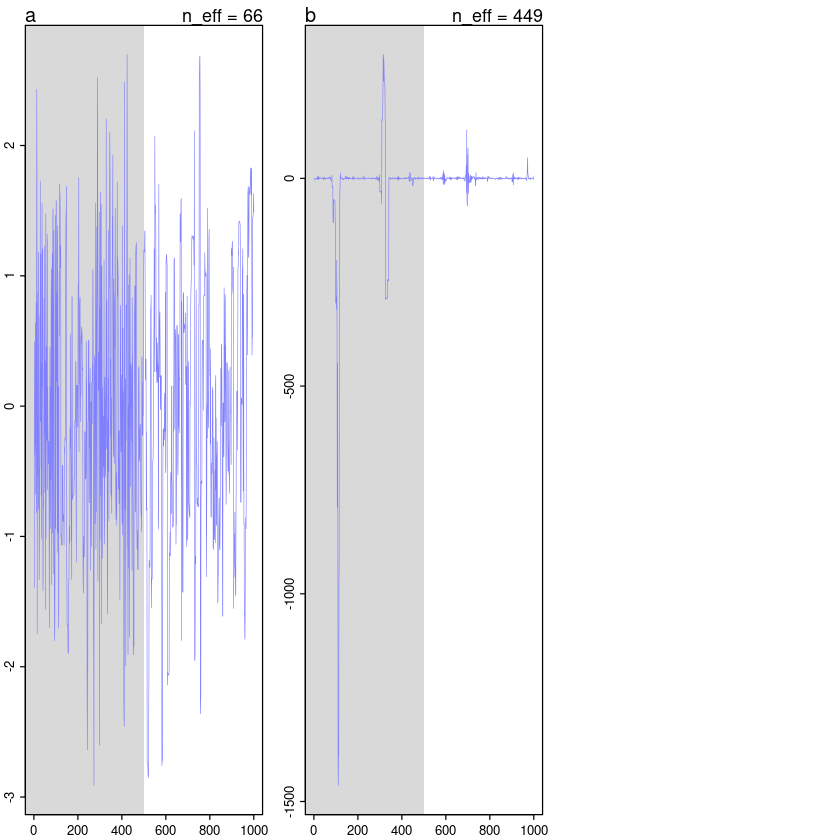

In [45]:
traceplot(mp)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


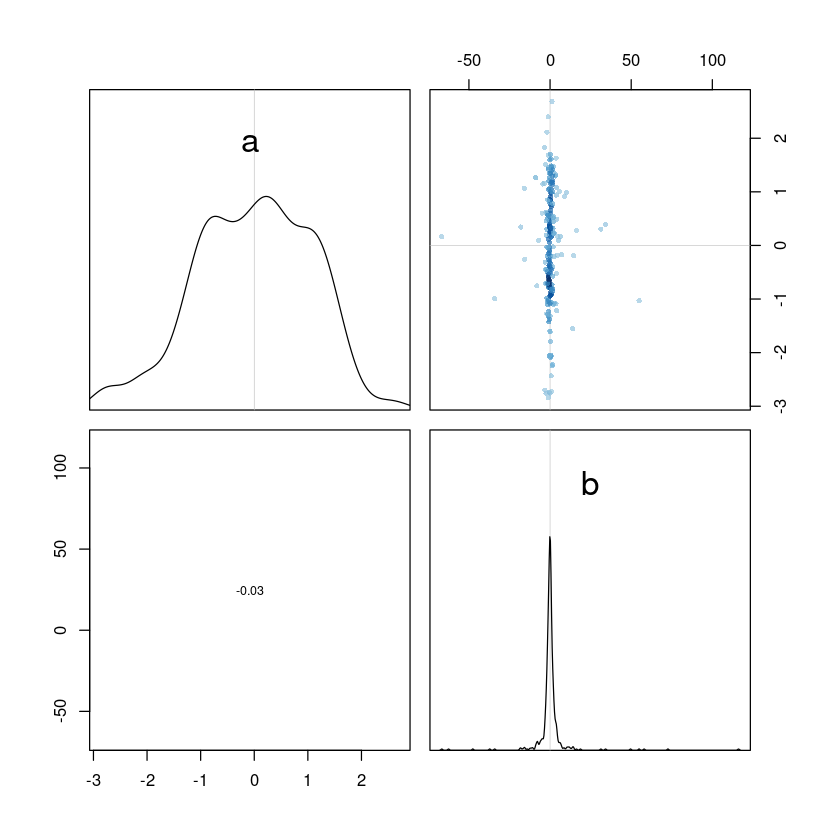

In [47]:
pairs(mp)

For b it makes no sense, we are just getting extreme values. We get a very sharp value for b posterior (same as prior). Cauchy distribution has no mean (1st moment) or variance (2nd moment). It is a pathological distribution. Therefore it does not satisfy the CLT, and MCMC cannot work 

### 9H2.
Recall the divorce rate example from Chapter 5. Repeat that analysis, using ulam this time,
fitting models m5.1, m5.2, and m5.3. Use compare to compare the models on the basis of WAIC
or PSIS. To use WAIC or PSIS with ulam, you need add the argument log_log=TRUE. Explain the
model comparison results.

In [48]:
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

In [49]:
d$D <- standardize( d$Divorce )
d$M <- standardize( d$Marriage )
d$A <- standardize( d$MedianAgeMarriage )

In [52]:
dat_slim <- list(
    D = d$D,
    M = d$M,
    A = d$A
)

In [65]:
m5.1 <- ulam(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bA * A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bA ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = dat_slim, chain = 4, core=4, log_lik=TRUE)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [66]:
m5.2 <- ulam(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bM * M ,
        a ~ dnorm( 0 , 0.2 ) ,
        bM ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = dat_slim, chain=4, core=4, log_lik=TRUE)


Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpEea6Tu/model-24772cb557c1.stan', line 19, column 4 to column 29)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 

In [64]:
m5.3 <- ulam(
    alist(
        D ~ dnorm( mu , sigma ) ,
        mu <- a + bM*M + bA*A ,
        a ~ dnorm( 0 , 0.2 ) ,
        bM ~ dnorm( 0 , 0.5 ) ,
        bA ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data = dat_slim, core=4, chain=4, log_lik=TRUE )

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [67]:
compare(m5.1, m5.2, m5.3, func = WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m5.1,125.7554,12.715099,0.00000,NA,3.672628,0.7111513733
m5.3,127.5641,12.676399,1.80867,0.6811518,4.697154,0.2878818333
m5.2,138.9567,9.678592,13.20131,9.3304085,2.762444,0.0009667934


looks like m5.3 and m5.1 are practically the same. m5.2 is off by a lot, so Marriage isn't a predictor

### 9H3.

Sometimes changing a prior for one parameter has unanticipated effects on other parameters.
This is because when a parameter is highly correlated with another parameter in the posterior, the
prior influences both parameters. Here’s an example to work and think through.

Go back to the leg length example in Chapter 6 and use the code there to simulate height and
leg lengths for 100 imagined individuals. Below is the model you fit before, resulting in a highly
correlated posterior for the two beta parameters. This time, fit the model using ulam:

In [69]:
N <- 100                          # number of individuals
set.seed(909)
height <- rnorm(N,10,2)           # sim total height of each
leg_prop <- runif(N,0.4,0.5)      # leg as proportion of height
leg_left <- leg_prop*height +     # sim left leg as proportion + error
    rnorm( N , 0 , 0.02 )
leg_right <- leg_prop*height +    # sim right leg as proportion + error
    rnorm( N , 0 , 0.02 )
                                  # combine into data frame
d <- data.frame(height,leg_left,leg_right)

In [70]:
m5.8s <- ulam(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) ,
        sigma ~ dexp( 1 )
    ) , data=d, chains=4,
    start=list(a=10,bl=0,br=0.1,sigma=1) )

Running MCMC with 4 sequential chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 3.5 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling)

See https://mc-stan.org/misc/warnings for details.




In [71]:
m5.8s2 <- ulam(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) ,
        sigma ~ dexp( 1 )
    ) , data=d, chains=4,
    constraints=list(br="lower=0"),
    start=list(a=10,bl=0,br=0.1,sigma=1) )

Running MCMC with 4 sequential chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 3.8 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling)

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


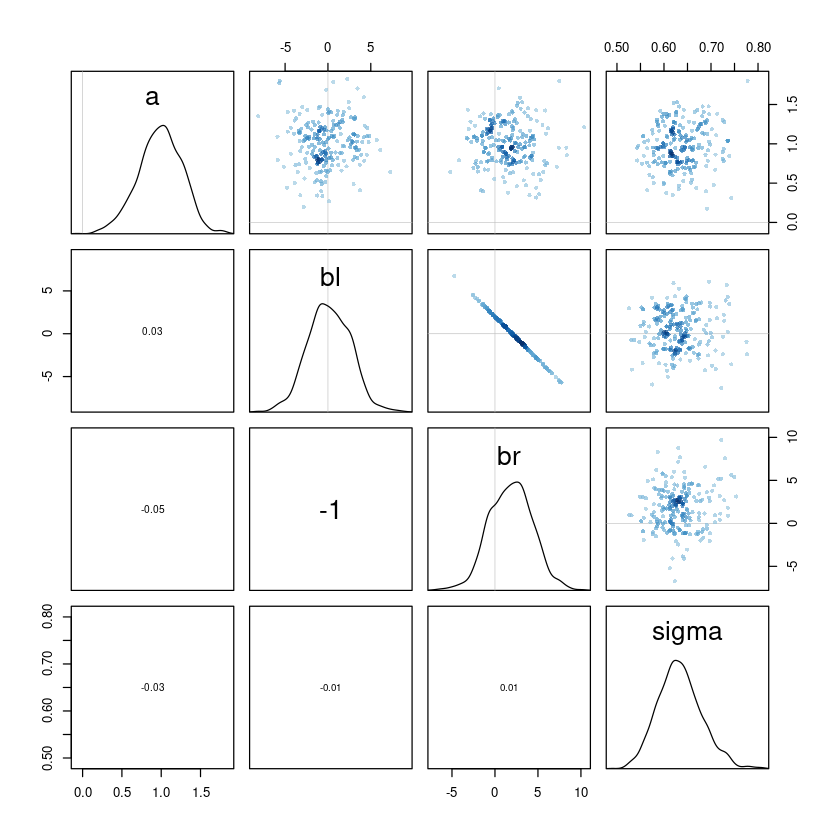

In [73]:
pairs(m5.8s)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


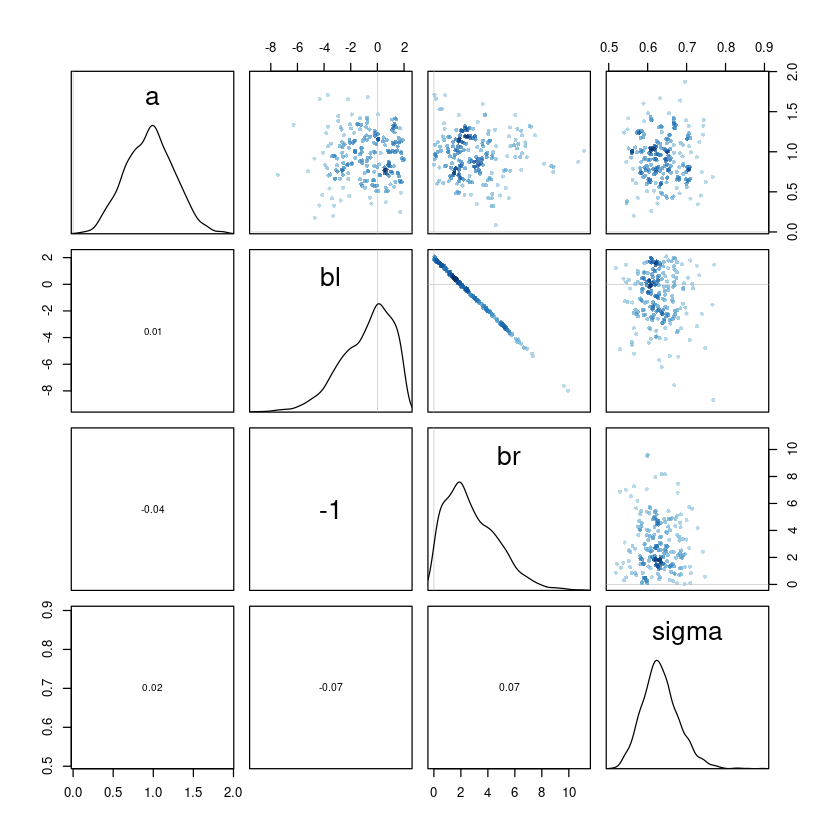

In [74]:
pairs(m5.8s2)

br is now skewed to one side, constrained to be positive so it's very close to 0. Because bl and br are correlated, it means that the bl is also changing its posterior distribution to match that of br (i.e. being close to 0) and symmetrically have a heavier tail to the negative side. This is because bl and br are highly correlated (negatively so, looking at the pair plots)

### 9H4 
For the two models fit in the previous problem, use WAIC or PSIS to compare the number of parameters for each model. You will need to use `log_lik = TRUE` to instruct `ulam` to compute the terms that both WAIC and PSIS need. Which model has more effective parameters and why?

In [75]:
m5.8s <- ulam(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) ,
        sigma ~ dexp( 1 )
    ) , data=d, chains=4,
    start=list(a=10,bl=0,br=0.1,sigma=1), log_lik = TRUE )

Running MCMC with 4 sequential chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 3.3 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling)

See https://mc-stan.org/misc/warnings for details.




In [76]:
m5.8s2 <- ulam(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) ,
        sigma ~ dexp( 1 )
    ) , data=d, chains=4,
    constraints=list(br="lower=0"),
    start=list(a=10,bl=0,br=0.1,sigma=1), log_lik=TRUE)

Running MCMC with 4 sequential chains...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 3.3 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling)

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




In [77]:
compare(m5.8s, m5.8s2, func = WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m5.8s2,194.6224,11.19411,0.0000000,NA,2.922978,0.5527446
m5.8s,195.0459,11.21739,0.4235328,0.6739588,3.168425,0.4472554


the WAIC are similar, the two functions are doing the same

In [78]:
precis(m5.8s, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.9920435,0.28578138,0.5484050,1.4714774,1047.8993,0.9995341
bl,0.2823425,2.46364081,-3.5452521,4.1740539,705.1057,1.0003315
br,1.7115696,2.46558201,-2.1871115,5.5126300,704.7635,1.0003022
sigma,0.6327081,0.04556469,0.5648355,0.7096261,941.3181,1.0049551


In [79]:
precis(m5.8s2, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.9706047,0.28999832,0.5085275,1.4391006,925.7436,0.9993589
bl,-0.7484430,1.87263299,-3.9730028,1.7512150,439.5810,1.0057052
br,2.7461581,1.87438889,0.2448469,5.9597084,436.9234,1.0057687
sigma,0.6357023,0.04734887,0.5655883,0.7187956,681.8344,1.0099049


however, m5.8s2 has significantly less effective paramters. It seems that because we constrained one paramter, it reduced the parameter space that MCMC needs to search for, so it became more efficient